# TC 5033
## Deep Learning
## Transfer Learning

<br>

#### Activity 2c: Exploring Transfer Learning with CIFAR-10
<br>

- Objective:

    In this activity, you'll study the concept of Transfer Learning, a powerful technique to improve the performance of your models by leveraging pre-trained architectures. The provided notebook offers a complete solution using a specific pre-trained model on the CIFAR-10 dataset. Your task is to extend this by trying out two other pre-trained models.
    
- Instructions:

    This activity should be submitted in the same format as previous activities. Remember to include the names of all team members in a markdown cell at the beginning of the notebook. The grade obtained in this notebook will be averaged with that of Activity 2b, for the grade of Activity 2.    

    Study the Provided Code: The provided notebook has a complete Transfer Learning solution using a particular pre-trained model. Make sure you understand the flow of the code and the role of each component.

    Select Two Other Pre-trained Models: Choose two different pre-trained models available in PyTorch's model zoo.

    Apply Transfer Learning: Add cells to implement Transfer Learning using the two models you've chosen. Train these models on the CIFAR-10 dataset.

    Evaluation: After training, evaluate your models' performance. Compare the results with the provided solution and try to interpret why there might be differences.

    Documentation: In a markdown cell, summarize your findings. Include any challenges you faced, how you overcame them, and any interesting insights you gained from comparing the different pre-trained models.

- Note:

    Although the provided code serves as a guide, you're encouraged to implement the new solutions on your own. The goal is to reinforce your understanding of Transfer Learning and how to apply it effectively.




### Descargar sets de datos

In [1]:
from torch.utils import data
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import v2


DATA_PATH = 'data'
MINIBATCH_SIZE = 128

transform_cifar = v2.Compose([
    v2.ToTensor(),
    v2.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261]),
    v2.Resize(224)
])

# Train dataset
cifar10_data = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                                 transform=transform_cifar)
trainset, validationset = data.random_split(cifar10_data, [0.9, 0.1])
train_loader = DataLoader(trainset, batch_size=MINIBATCH_SIZE, shuffle=True)
val_loader = DataLoader(validationset, batch_size=MINIBATCH_SIZE, shuffle=True)

#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                                transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)

/home/diego/miniconda3/envs/mna_py_310/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


### Usar GPU

In [2]:
import torch


device = torch.device('cuda')

### Mostrar imágenes

La imagen muestreada representa un: Deer


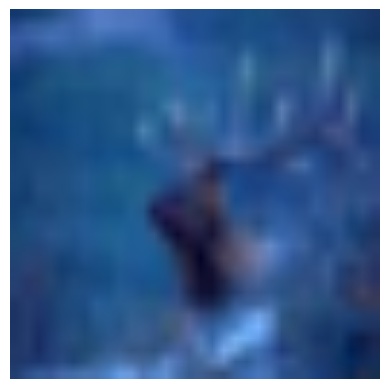

In [3]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def plot_figure(image):
    plt.imshow(image.permute(1,2,0))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)

### Calcular Accuracy

In [4]:
from torch.nn import CrossEntropyLoss, Module


def accuracy(model: Module, loader: DataLoader):
    criterion = CrossEntropyLoss()
    data_loss = 0
    true_positives = 0
    with torch.no_grad():
        for data in loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            data_loss += loss.item()
            predictions = torch.max(outputs, 1).indices
            true_positives += torch.eq(predictions, labels).int().sum().cpu().item()
    data_loss /= len(loader)
    acc = true_positives / len(loader.dataset)
    return acc, data_loss

### Cargar modelo pre-cargado

In [5]:
from torchvision import models
from torchvision.models.resnet import ResNet18_Weights


model_resnet18 = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

#### Exploremos el modelo

In [6]:
for i, w in enumerate(model_resnet18.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 3, 3]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([64, 64, 3, 3]) True
7 torch.Size([64]) True
8 torch.Size([64]) True
9 torch.Size([64, 64, 3, 3]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([64, 64, 3, 3]) True
13 torch.Size([64]) True
14 torch.Size([64]) True
15 torch.Size([128, 64, 3, 3]) True
16 torch.Size([128]) True
17 torch.Size([128]) True
18 torch.Size([128, 128, 3, 3]) True
19 torch.Size([128]) True
20 torch.Size([128]) True
21 torch.Size([128, 64, 1, 1]) True
22 torch.Size([128]) True
23 torch.Size([128]) True
24 torch.Size([128, 128, 3, 3]) True
25 torch.Size([128]) True
26 torch.Size([128]) True
27 torch.Size([128, 128, 3, 3]) True
28 torch.Size([128]) True
29 torch.Size([128]) True
30 torch.Size([256, 128, 3, 3]) True
31 torch.Size([256]) True
32 torch.Size([256]) True
33 torch.Size([256, 256, 3, 3]) True
34 torch.Size([25

In [7]:
model_resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#### Ajustar a nuestro modelo

In [8]:
from torch.nn import Flatten


model_resnet18.fc = Flatten()
for i, parameter in enumerate(model_resnet18.parameters()):
    parameter.requires_grad = False
    print(i, parameter.requires_grad)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False


### Loop de entrenamiento

In [9]:
def train(model: Module, optimizer, epochs: int):
    criterion = CrossEntropyLoss()
    for epoch in range(epochs):
        train_loss = 0
        model.train()
        for data in train_loader:
            images, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        acc, val_loss = accuracy(model, val_loader)
        print(f"Epoch {epoch+1} - loss: {round(train_loss, 4)} - val_loss: {round(val_loss, 4)} - accuracy: {round(acc, 4)}")

In [10]:
from torch.nn import Linear, Sequential


model1 = Sequential(
    model_resnet18,
    Linear(in_features=512, out_features= 10, bias= True)
).to(device)

In [11]:
from torch.optim.adam import Adam


optimiser = Adam(model1[1].parameters(), lr=0.001)
train(model1, optimiser, 5)
optimiser = Adam(model1[1].parameters(), lr=0.0001)
train(model1, optimiser, 6)

Epoch 1 - loss: 0.9304 - val_loss: 0.6715 - accuracy: 0.78
Epoch 2 - loss: 0.6363 - val_loss: 0.6156 - accuracy: 0.7908
Epoch 3 - loss: 0.5975 - val_loss: 0.5791 - accuracy: 0.7972
Epoch 4 - loss: 0.5759 - val_loss: 0.5578 - accuracy: 0.8086
Epoch 5 - loss: 0.564 - val_loss: 0.5656 - accuracy: 0.809
Epoch 1 - loss: 0.5398 - val_loss: 0.5645 - accuracy: 0.8104
Epoch 2 - loss: 0.5368 - val_loss: 0.5587 - accuracy: 0.8094
Epoch 3 - loss: 0.5366 - val_loss: 0.5742 - accuracy: 0.8136
Epoch 4 - loss: 0.5354 - val_loss: 0.56 - accuracy: 0.8114
Epoch 5 - loss: 0.5363 - val_loss: 0.5443 - accuracy: 0.8086
Epoch 6 - loss: 0.5371 - val_loss: 0.5629 - accuracy: 0.817


In [12]:
accuracy(model1, test_loader)

(0.8038, 0.5802852696255792)

## GoogLe Net

In [22]:
from torchvision.models.googlenet import GoogLeNet_Weights


googlenet_model = models.googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)
for parameter in googlenet_model.parameters():
    parameter.requires_grad_(False)
googlenet_model.fc = Linear(1024, 10)
googlenet_model = googlenet_model.to(device)

In [23]:
optimiser = Adam(googlenet_model.fc.parameters(), lr=0.0005)
train(googlenet_model, optimiser, 7)

Epoch 1 - loss: 1.184 - val_loss: 0.815 - accuracy: 0.7558
Epoch 2 - loss: 0.7572 - val_loss: 0.724 - accuracy: 0.7748
Epoch 3 - loss: 0.6879 - val_loss: 0.6679 - accuracy: 0.7802
Epoch 4 - loss: 0.6519 - val_loss: 0.6594 - accuracy: 0.7808
Epoch 5 - loss: 0.6363 - val_loss: 0.6368 - accuracy: 0.783
Epoch 6 - loss: 0.6241 - val_loss: 0.6317 - accuracy: 0.7788
Epoch 7 - loss: 0.6141 - val_loss: 0.6336 - accuracy: 0.783


In [24]:
accuracy(googlenet_model, test_loader)

(0.783, 0.6368744818470146)

## ViT

In [13]:
from torchvision.models import ViT_B_16_Weights


vit_model = models.vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_SWAG_LINEAR_V1)
for parameter in vit_model.parameters():
    parameter.requires_grad = False
vit_model.heads[0] = Linear(768, 10)
vit_model = vit_model.to(device)

In [14]:
optimiser = Adam(vit_model.heads.parameters(), lr=0.0005)
train(vit_model, optimiser, 3)

Epoch 1 - loss: 0.3517 - val_loss: 0.219 - accuracy: 0.9306
Epoch 2 - loss: 0.209 - val_loss: 0.1916 - accuracy: 0.9406
Epoch 3 - loss: 0.1888 - val_loss: 0.1831 - accuracy: 0.9422


In [18]:
accuracy(vit_model, test_loader)

(0.9371, 0.20395610274016102)